#봉천데자와_20160512 : Markov Chain Monte Carlo
#Metropolis-Hastings Algorithm Demo
## Code written by Seongho Son

#Importing Numpy, Matplotlib and Interact Widget

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact # Only works for IPython < 3.x.x. For 4.x.x or above, refer to https://github.com/ipython/ipywidgets

%pylab inline

Populating the interactive namespace from numpy and matplotlib


#Defining functions
###1) f_norm : normal distribution function.
###2) f_kde : function used for kernel density estimation.
###3) sample_corr: calculates correlation coefficient between samples

In [50]:
def f_norm (x, m, sd):
    ix = x-m
    return np.exp(-np.multiply(ix, ix) / (2 * sd**2)) / (sd * np.sqrt(2 * np.pi))

def f_kde(s, x, h):
    res = 0
    for i in xrange(len(s)):
        res += f_norm((x-s[i])/h, 0, 1)
    return res / (len(s) * h)

def sample_corr(s, itv):
    v1 = s[:-itv]
    v2 = s[itv:]
    return np.corrcoef(v1, v2)

#Sampling

In [72]:
# range of x to examine
xx = np.linspace(-20, 20, 20*2*10)

#means and std.devs used for making target distributions
ms = [1, -5.5, 6]
sds = [1, 1.5, 2]

#variables used for the algorithm
init_sample = -18; # starting point of sampling
prev_sample = init_sample
samples = [] # Values sampled from target distribution
arrays_acpt = [[], []]
array_corr = []
yys = [] # will store values of kernel denstiy estimation

# Target distributions - Try making your own!
f_sample1 = lambda x: 0.3 * f_norm(x, ms[0], sds[0]) + 0.4 * f_norm(x, ms[1], sds[1]) + 0.3 * f_norm(x, ms[2], sds[2])
f_sample2 = lambda x: 0.5 * f_norm(x, ms[1], sds[2]) + 0.5 * f_norm(x, ms[2], sds[2]) 
f_sample3 = lambda x: 0.3 * f_norm(x, ms[0], sds[1]) + 0.4 * f_norm(x, ms[1], sds[2]) + 0.3 * f_norm(x, ms[2], sds[0])


while len(samples) < 1000:
    # Calculate a sample candidate, based on previous value
    next_sample = prev_sample + 2*np.random.randn()
    acceptance = f_sample1(next_sample) / f_sample1(prev_sample)
    
    # Check acceptance, decide whether to use the value as a sample
    if acceptance > 1:
        prev_sample = next_sample
        samples.append(prev_sample)
        arrays_acpt[0].append(1)
        arrays_acpt[1].append(1)
        yys.append(f_kde(samples, xx, 0.5))
    else:
        if np.random.rand() < acceptance:
            prev_sample = next_sample
            samples.append(prev_sample)
            arrays_acpt[1].append(acceptance)
            yys.append(f_kde(samples, xx, 0.5))
        arrays_acpt[0].append(acceptance)


# Check Kullback-Leibler divergence
kl_div = 0
for i in xrange(len(xx)):
    p1 = f_sample1(xx[i])
    p2 = f_kde(samples, xx[i], 0.5)
    kl_div += p1 * np.log(p1 / p2)

# Calculate correlation coefficients
for i in xrange(100):
    corr = sample_corr(samples, i+1)
    array_corr.append(corr[0,1])

#Draw Sampling History Using KDE

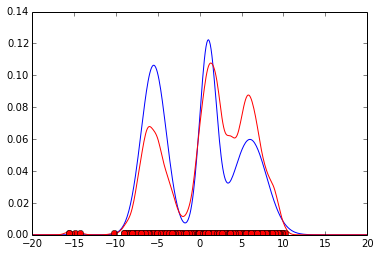

In [73]:
@interact(si = (0, len(samples) - 1))
def draw_sampling(si):
    plt.plot(xx, f_sample1(xx))
    plt.plot(xx, yys[si], 'r')
    plt.plot(samples[:si+1], np.zeros(si+1) +0.001, 'ro')


#Check Correlation Coefficient of Samples

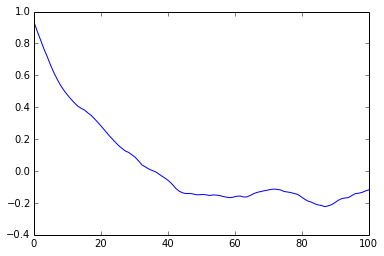

In [74]:
plt.plot(np.linspace(0, 100, 100), array_corr)

#All The Calculated Acceptances

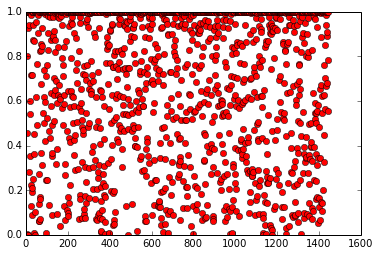

In [75]:
plt.plot(np.arange(len(arrays_acpt[0])), arrays_acpt[0], 'ro')

#Chosen Acceptances Only

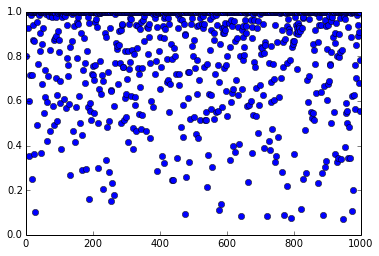

In [76]:
plt.plot(np.arange(len(arrays_acpt[1])), arrays_acpt[1], 'bo')

# Check Acceptance Rate

In [77]:
float(len(arrays_acpt[1])) / float(len(arrays_acpt[0]))

0.6920415224913494